In [1]:
import numpy as np
import torch
from networks import DQN
import rubiks2
import copy
import time
from tqdm import tqdm_notebook
from MCTS import MonteCarloSearchTree, State

In [2]:
env = rubiks2.RubiksEnv2(2, unsolved_reward = -1.0)
network = torch.load('./models/Exp3sSame/model.pt')
c = 4.0
nu = 2.0
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MCTS = MonteCarloSearchTree(env, network, 60.0, device, c, nu)

FileNotFoundError: [Errno 2] No such file or directory: './models/Exp3sSame/model.pt'

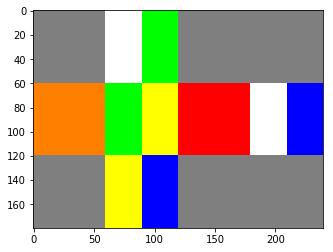

In [4]:
env.step(1)
env.render()

In [7]:
c = 4.0
nu = 10.0

solve_rate = np.zeros(14)
counts = np.zeros(14)
seq_len = np.zeros(14)

try:
    for i in range(14):
        hashes = []
        if i > 0:
            if solve_rate[i-1]==0:
                break

        for sequence in tqdm_notebook(superflip_set):
            env = rubiks2.RubiksEnv2(2, unsolved_reward=-1.0)

            hashed_sequence = hash(str(sequence[:i+1]))

            if not hashed_sequence in hashes:

                hashes.append(hashed_sequence)


                counts[i] += 1

                for j in range(i + 1):
                    env.step(sequence[j])

                MCTS = MonteCarloSearchTree(env, network, 5.0, device, c, nu)
                solved, solve_sequence = MCTS.search()
                solve_rate[i] += solved

                if solved:
                    seq_len[i] += len(solve_sequence)


except KeyboardInterrupt:
    pass

print(np.divide(solve_rate, counts))
print(np.divide(seq_len, solve_rate))

HBox(children=(IntProgress(value=0, max=276), HTML(value='')))

HBox(children=(IntProgress(value=0, max=276), HTML(value='')))

HBox(children=(IntProgress(value=0, max=276), HTML(value='')))

HBox(children=(IntProgress(value=0, max=276), HTML(value='')))

HBox(children=(IntProgress(value=0, max=276), HTML(value='')))

HBox(children=(IntProgress(value=0, max=276), HTML(value='')))

HBox(children=(IntProgress(value=0, max=276), HTML(value='')))

[1.         1.         0.99019608 0.98529412 0.96850394 0.83520599
 0.60606061        nan        nan        nan        nan        nan
        nan        nan]
[1.         2.         3.15841584 4.14925373 5.14634146 6.34977578
 7.3               nan        nan        nan        nan        nan
        nan        nan]


/home/joe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide
/home/joe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


In [58]:
print(counts)
solve_rate

[  6.  27. 102. 204. 254. 267. 274. 274. 274. 274. 275. 275. 275. 276.]


array([  6.,  27., 100., 189., 226., 232., 183.,  90.,  42.,  10.,   6.,
         6.,   3.,   1.])

In [59]:
c = 4.0
nu = 10.0

solve_rate = 0
counts = 0
seq_len = 0

try:
    for i in tqdm_notebook(range(640)):
        env = rubiks2.RubiksEnv2(2, unsolved_reward=-1.0)
        env.reset(15)
        
        counts += 1

        MCTS = MonteCarloSearchTree(env, network, 5.0, device, c, nu)
        solved, solve_sequence = MCTS.search()
        solve_rate += solved

        if solved:
            seq_len += len(solve_sequence)
        
except KeyboardInterrupt:
    pass

print(solve_rate/counts)
print(seq_len/solve_rate)

HBox(children=(IntProgress(value=0, max=640), HTML(value='')))

0.4390625
7.797153024911032


In [61]:
c = 4.0
nu = 10.0

solve_rate = 0
counts = 0
seq_len = 0

try:
    for i in tqdm_notebook(range(640)):
        env = rubiks2.RubiksEnv2(2, unsolved_reward=-1.0)
        env.reset(1000)
        
        counts += 1

        MCTS = MonteCarloSearchTree(env, network, 5.0, device, c, nu)
        solved, solve_sequence = MCTS.search()
        solve_rate += solved

        if solved:
            seq_len += len(solve_sequence)
        
except KeyboardInterrupt:
    pass

print(solve_rate/counts)
print(seq_len/solve_rate)

HBox(children=(IntProgress(value=0, max=640), HTML(value='')))

RuntimeError: CUDA error: unspecified launch failure

In [6]:
superflip_set = [[4,0,5,1,5,4,5,5,1,3,2,1,3,3],
[0,5,1,1,0,0,1,5,0,2,2,4,4,5],
[1,2,2,3,3,5,0,4,0,2,4,3,5,0],
[1,0,5,0,4,3,3,1,3,1,0,2,3,2],
[5,0,5,1,5,1,5,1,5,1,5,3,1,5],
[3,5,3,2,4,2,4,5,1,0,4,3,5,0],
[2,4,2,0,0,2,4,5,3,1,0,0,4,4],
[5,0,5,4,3,2,3,4,3,2,4,2,2,1],
[2,0,4,0,4,0,4,0,4,5,3,5,4,5],
[2,4,2,4,3,2,2,1,3,5,4,4,2,3],
[4,4,0,4,0,5,4,5,0,0,1,3,1,2],
[0,4,0,5,1,1,0,2,2,3,2,3,5,5],
[0,1,0,4,2,4,2,4,0,2,4,5,4,3],
[2,3,2,2,1,5,1,5,3,5,1,5,5,4],
[4,0,5,4,0,4,3,2,3,5,1,0,5,0],
[2,3,1,2,1,5,3,2,3,1,2,1,2,2],
[5,4,0,5,3,1,2,4,2,1,5,1,0,2],
[2,4,0,1,3,4,0,0,2,2,4,0,5,4],
[5,1,2,3,4,3,5,3,2,4,2,0,2,0],
[1,2,0,4,2,3,1,3,1,0,4,5,0,1],
[4,2,1,5,0,2,3,5,4,2,3,1,5,3],
[2,3,4,5,1,5,0,4,2,3,1,2,1,3],
[0,5,1,3,2,4,0,0,4,0,4,0,5,0],
[5,1,2,3,5,1,3,4,2,4,5,5,0,2],
[0,4,3,5,1,0,5,0,2,3,4,4,3,1],
[3,3,4,2,4,5,1,3,3,5,0,2,0,0],
[5,3,1,3,5,1,0,0,1,0,1,5,4,4],
[2,0,1,5,1,3,1,2,4,3,2,4,0,2],
[1,0,4,3,5,3,5,1,5,0,4,3,2,1],
[3,1,0,2,2,0,5,3,1,3,4,5,1,3],
[1,3,5,4,0,2,2,3,1,3,4,0,2,3],
[5,3,1,1,3,2,1,5,0,5,1,1,2,3],
[4,3,2,1,3,5,1,5,4,4,2,4,3,4],
[4,4,3,5,0,5,5,3,1,3,2,4,5,1],
[4,4,5,0,5,3,2,1,1,3,1,0,1,1],
[5,1,2,3,2,1,2,3,3,4,3,2,4,4],
[3,3,1,2,4,0,4,2,4,3,3,4,2,2],
[3,5,0,5,5,3,1,3,2,3,2,1,5,4],
[3,4,2,2,4,5,1,5,0,5,1,2,4,5],
[4,2,4,2,2,1,0,4,0,1,2,4,5,4],
[4,0,4,0,5,1,2,1,3,2,1,0,5,3],
[1,2,2,3,3,4,0,2,1,0,4,0,5,0],
[2,3,3,5,1,3,2,3,1,5,4,4,2,2],
[1,2,2,4,2,4,0,4,3,3,5,5,4,0],
[4,0,4,4,5,4,4,2,4,0,5,5,0,4],
[5,1,3,2,1,3,2,1,2,1,0,5,4,3],
[4,4,2,0,1,1,5,3,1,3,2,0,4,5],
[0,1,5,3,2,1,5,3,2,4,0,2,4,2],
[1,3,2,3,5,0,1,5,0,1,3,4,0,0],
[1,2,1,3,1,5,1,3,1,5,4,3,5,5],
[3,1,3,4,2,3,4,3,4,4,0,2,3,1],
[5,1,2,2,1,5,0,5,5,3,5,5,1,3],
[5,3,2,4,0,5,4,3,2,4,5,3,2,3],
[1,2,1,3,2,4,0,4,2,0,1,2,3,5],
[3,5,5,3,5,0,5,4,2,2,4,2,3,2],
[4,5,1,5,4,2,1,1,3,5,1,2,3,2],
[3,5,1,3,3,1,2,3,2,3,1,2,4,2],
[2,0,1,3,2,3,1,3,2,4,5,0,4,4],
[1,2,4,2,0,0,4,3,1,3,2,2,0,0],
[2,3,3,5,4,0,4,0,4,5,4,5,4,0],
[2,1,3,2,2,3,1,3,2,0,4,3,3,2],
[4,4,5,4,2,2,4,0,5,0,1,3,2,3],
[3,2,4,4,3,5,0,4,0,4,5,5,1,0],
[3,4,2,4,2,4,2,4,0,2,0,2,0,1],
[4,5,3,4,0,4,5,0,1,3,1,2,1,2],
[3,5,5,1,3,2,4,3,3,4,3,2,1,1],
[3,4,4,3,1,2,3,1,5,0,5,4,5,0],
[0,2,0,1,1,5,0,1,3,1,3,5,1,5],
[3,1,5,1,2,0,5,3,1,5,5,4,2,4],
[2,4,4,5,3,1,3,5,1,2,4,3,3,4],
[3,1,3,4,3,5,1,5,0,5,4,4,0,4],
[2,3,1,5,3,1,5,1,2,1,5,5,1,2],
[3,3,4,0,1,5,3,2,3,3,2,3,1,3],
[1,5,3,1,2,0,2,0,4,0,5,3,5,4],
[0,1,1,5,0,4,5,0,2,4,5,1,5,4],
[3,2,4,2,1,5,0,0,1,2,4,5,4,0],
[0,4,0,5,0,4,2,4,2,2,4,2,3,2],
[5,0,5,5,4,3,5,1,5,1,5,3,1,5],
[0,5,4,5,0,4,0,4,0,1,5,3,3,2],
[5,5,3,2,3,1,0,1,5,1,1,3,5,5],
[0,5,1,0,5,3,3,5,1,2,0,5,5,4],
[0,4,5,5,1,5,0,5,3,1,5,4,3,1],
[5,1,0,4,2,2,0,1,2,2,1,5,1,1],
[4,4,0,2,3,1,5,1,3,4,4,3,1,1],
[0,5,1,5,1,2,2,0,0,1,1,2,4,2],
[2,0,2,2,3,1,0,4,0,2,2,3,1,2],
[4,0,2,3,1,5,3,1,5,0,2,4,0,4],
[1,3,5,4,0,2,4,2,4,3,5,4,4,0],
[5,4,3,5,1,5,1,1,2,4,2,0,4,3],
[1,5,4,0,5,4,3,1,2,3,4,4,5,3],
[0,2,3,2,0,2,3,1,3,1,5,1,0,0],
[5,4,3,2,3,2,0,5,0,4,4,2,0,2],
[2,1,5,1,2,4,4,0,2,1,2,4,3,3],
[2,3,2,2,1,0,1,3,5,1,2,1,1,2],
[5,0,4,3,1,3,4,0,1,5,1,0,1,3],
[5,5,0,0,2,4,2,1,5,0,4,3,4,4],
[1,0,5,0,1,2,4,5,1,3,5,0,2,3],
[4,4,2,0,5,1,5,0,5,1,1,5,3,3],
[0,2,4,5,5,4,5,3,1,3,3,2,3,1],
[4,0,5,5,1,3,5,1,3,1,3,5,0,4],
[0,2,2,4,2,4,3,2,2,3,3,1,0,2],
[5,1,3,1,2,0,4,2,2,0,4,4,3,1],
[1,2,1,1,0,5,0,5,1,2,0,5,3,5],
[3,1,5,1,0,4,3,1,0,2,4,5,5,0],
[5,5,1,0,4,2,3,2,4,5,5,1,2,2],
[2,3,2,3,1,5,0,1,2,3,3,5,1,3],
[4,2,4,4,0,4,5,0,5,0,4,3,1,3],
[1,3,1,3,4,0,2,2,0,1,0,4,2,2],
[3,1,5,1,5,0,4,3,4,5,5,1,3,1],
[5,4,0,1,5,0,2,4,0,5,1,1,2,3],
[2,1,0,4,5,0,4,2,3,2,4,2,1,0],
[0,4,2,1,3,2,4,0,2,1,5,5,3,1],
[0,5,3,4,4,3,2,0,5,0,4,5,4,3],
[2,3,2,3,5,0,1,5,4,5,0,5,5,4],
[4,0,5,5,0,2,0,4,2,0,4,5,0,4],
[4,0,4,5,1,5,0,1,2,3,2,1,1,3],
[3,4,4,2,1,5,1,3,2,4,4,5,1,1],
[0,5,3,3,2,0,2,4,0,4,0,5,1,2],
[2,1,5,1,3,1,0,5,0,2,2,3,3,1],
[0,4,5,5,0,4,3,1,3,2,3,2,1,3],
[1,0,0,5,0,5,1,3,3,1,2,3,2,2],
[4,5,1,3,4,2,0,5,4,2,3,5,5,1],
[3,2,1,5,3,2,3,4,5,4,4,2,1,3],
[3,5,5,1,3,5,3,2,2,1,3,5,1,2],
[3,4,2,1,1,2,3,4,3,5,3,5,5,1],
[0,4,0,5,0,4,3,2,3,1,1,0,2,1],
[2,1,5,0,4,3,4,2,3,3,1,0,0,1],
[4,4,3,2,4,2,0,2,0,0,5,0,5,4],
[2,0,4,0,4,5,4,2,0,0,2,4,5,0],
[1,2,3,1,3,2,4,4,5,3,4,3,5,0],
[4,2,3,5,3,2,3,5,3,1,2,3,5,0],
[3,4,0,4,2,3,1,0,5,4,4,0,2,2],
[4,2,2,4,0,2,3,1,5,1,1,0,4,4],
[1,2,0,2,0,4,0,5,3,1,3,4,0,4],
[0,1,3,1,1,5,0,1,3,2,4,4,0,5],
[2,3,1,3,1,2,3,4,4,2,4,4,3,1],
[4,0,5,5,4,5,1,5,0,4,5,3,1,0],
[2,4,2,3,2,0,5,4,4,0,5,5,4,0],
[5,3,1,5,0,2,1,3,4,2,1,5,1,3],
[4,4,0,5,1,3,1,2,1,5,0,1,0,5],
[5,1,1,5,1,2,3,1,3,5,5,1,0,0],
[1,5,3,2,3,5,0,1,2,2,1,5,1,3],
[5,4,0,0,2,1,0,4,2,3,1,3,1,2],
[0,1,1,0,4,3,5,0,4,5,3,1,5,3],
[5,4,2,4,2,3,2,1,0,0,4,5,0,0],
[4,0,5,0,5,0,2,0,4,3,2,3,4,5],
[2,0,5,0,4,4,5,4,2,4,0,0,4,4],
[0,4,2,3,1,3,4,0,2,2,4,2,2,0],
[2,3,4,5,0,1,2,3,2,1,3,5,3,3],
[4,2,3,4,3,1,1,3,4,3,4,2,0,4],
[0,4,3,2,4,5,5,1,3,2,1,3,5,5],
[5,1,0,1,0,5,1,5,4,2,2,4,3,4],
[5,5,4,5,4,0,1,5,3,2,1,3,4,4],
[4,4,0,5,3,1,5,0,1,3,3,4,2,4],
[5,3,2,1,5,1,3,4,5,0,4,4,5,5],
[5,0,5,0,5,1,5,5,0,4,3,4,0,2],
[0,2,3,4,5,1,5,1,1,3,2,0,4,0],
[5,3,2,3,5,0,1,5,4,2,4,3,3,2],
[2,4,4,0,4,0,4,2,3,1,2,0,4,5],
[5,5,1,3,5,4,3,2,1,5,4,2,3,4],
[5,5,4,2,3,1,5,1,2,0,4,3,4,5],
[4,2,3,5,3,2,3,5,3,1,2,3,5,3],
[1,3,2,4,5,3,3,1,0,2,3,1,0,2],
[3,2,4,4,0,5,3,2,0,2,2,1,1,3],
[1,0,4,2,1,3,2,2,3,4,5,1,5,5],
[3,1,0,4,2,2,4,3,4,0,4,2,2,4],
[2,3,1,2,2,4,2,1,5,0,5,1,5,3],
[1,5,0,5,3,4,5,4,2,3,5,1,3,2],
[0,4,0,4,0,4,5,0,4,5,0,1,2,2],
[3,2,4,4,3,4,2,4,5,1,0,0,5,5],
[1,3,4,4,5,1,3,5,0,4,2,3,5,3],
[3,3,1,5,1,5,1,2,1,3,5,0,5,3],
[3,1,0,4,2,3,2,0,2,4,4,3,2,4],
[4,2,3,1,1,2,0,2,2,3,1,3,1,5],
[5,3,1,5,1,5,3,4,4,2,4,5,4,2],
[5,1,2,3,1,1,2,0,5,5,0,5,1,1],
[2,4,0,1,3,1,3,2,0,1,1,0,2,2],
[4,0,5,5,0,2,2,1,0,1,0,4,5,5],
[3,2,1,5,0,5,0,1,5,1,2,0,4,0],
[2,4,2,3,5,0,2,2,1,5,3,2,3,1],
[3,3,5,1,2,3,3,5,1,3,4,2,2,3],
[5,1,3,4,3,5,3,1,2,4,4,0,2,4],
[4,4,3,4,5,0,2,3,2,3,4,2,1,2],
[2,3,3,2,3,3,1,5,4,5,0,4,0,1],
[4,2,3,1,3,5,4,0,1,3,4,2,1,1],
[5,0,2,4,5,3,3,1,3,5,4,0,1,1],
[3,4,0,1,5,0,0,1,2,4,0,4,4,3],
[2,3,5,4,2,4,0,2,0,5,1,1,5,5],
[4,2,3,5,1,3,2,1,5,4,3,1,5,3],
[5,1,3,5,4,2,3,4,5,1,2,3,4,0],
[5,5,3,2,3,4,0,4,3,1,0,5,4,5],
[3,5,0,4,3,5,5,1,3,2,0,2,4,2],
[3,1,2,0,5,1,0,2,3,5,1,0,4,5],
[2,0,5,3,3,5,1,3,4,2,3,5,3,4],
[1,0,5,1,2,3,1,1,2,4,4,2,2,0],
[1,5,1,5,1,3,5,0,4,3,1,5,4,2],
[0,1,3,3,2,3,4,5,1,5,1,0,0,4],
[1,3,4,0,5,3,2,0,1,3,2,4,0,2],
[3,2,3,2,2,1,2,1,3,1,3,1,2,4],
[4,2,4,0,2,0,4,3,5,0,4,0,4,5],
[3,1,2,2,4,0,4,2,3,1,0,1,5,1],
[0,1,1,5,1,3,1,5,4,3,1,5,3,3],
[3,3,2,2,3,1,2,0,4,2,3,4,3,1],
[4,4,0,4,3,1,2,1,5,5,4,2,0,2],
[2,4,0,0,1,2,4,2,3,1,2,4,4,3],
[3,1,0,4,2,2,4,3,4,0,5,5,0,5],
[5,3,1,1,0,5,1,2,1,0,2,2,1,2],
[5,3,4,0,4,3,3,5,1,2,3,2,4,3],
[2,3,5,1,3,3,5,4,2,2,4,2,0,0],
[0,5,1,3,2,3,2,4,3,1,1,2,3,4],
[4,2,4,4,3,5,0,4,3,2,3,3,1,1],
[2,4,0,0,4,3,3,5,3,5,4,0,5,5],
[2,3,2,2,1,5,4,2,3,4,5,3,2,4],
[2,1,3,1,1,0,4,2,3,1,2,0,5,1],
[0,5,0,5,1,3,2,4,5,4,2,1,3,5],
[5,1,0,4,3,2,4,2,4,5,5,3,2,4],
[5,0,4,0,4,5,0,2,0,4,0,5,0,1],
[2,3,2,4,3,1,5,4,2,3,5,0,4,2],
[1,5,0,5,1,2,3,2,4,0,0,4,3,4],
[2,3,4,0,2,2,1,3,2,4,2,4,2,4],
[2,0,1,5,0,0,4,2,4,3,2,0,0,1],
[5,5,3,1,3,3,5,0,2,3,2,4,0,4],
[0,2,2,4,2,3,2,4,4,2,1,3,4,4],
[2,0,4,2,2,1,3,2,3,2,4,3,1,0],
[3,1,2,3,5,1,5,5,3,3,1,0,4,0],
[3,5,0,1,1,3,2,3,1,5,0,2,0,4],
[4,5,1,3,2,2,1,1,3,1,5,0,5,3],
[5,0,4,2,3,2,4,3,2,3,5,0,5,4],
[3,2,1,2,4,2,1,2,4,4,0,2,4,3],
[3,5,5,4,4,2,3,2,0,5,4,4,5,0],
[1,0,2,4,2,0,0,5,0,5,1,0,4,2],
[4,2,4,3,2,4,2,1,0,5,1,2,2,3],
[2,1,0,0,5,0,1,3,2,3,1,1,2,0],
[4,2,2,1,2,4,2,3,2,0,2,1,2,4],
[2,3,5,4,4,0,1,2,1,5,0,0,1,1],
[5,5,1,0,2,3,1,5,5,4,0,5,3,4],
[3,1,5,4,2,3,2,0,2,4,0,0,4,0],
[3,2,3,4,0,1,3,4,5,0,1,1,5,1],
[5,3,1,2,0,4,0,2,4,2,0,1,2,2],
[2,4,3,4,2,4,0,4,2,3,1,0,1,5],
[3,3,1,2,2,1,0,5,1,3,1,0,5,0],
[4,2,1,5,0,4,4,2,2,0,5,3,2,4],
[0,5,1,2,2,1,0,1,3,5,0,4,0,1],
[2,4,5,4,0,1,1,5,3,1,3,2,3,2],
[5,0,4,0,4,5,4,2,1,0,4,0,4,4],
[4,4,5,4,2,2,0,1,3,1,3,5,1,2],
[2,1,3,5,0,2,3,4,5,1,3,4,5,1],
[0,2,3,5,5,3,1,3,4,0,5,3,5,4],
[4,3,1,3,2,4,0,4,2,4,5,0,1,1],
[0,5,3,4,4,2,4,2,3,5,1,1,0,1],
[3,4,4,2,4,0,1,0,0,1,0,0,2,1],
[4,3,2,1,5,3,1,5,3,5,3,4,0,1],
[2,4,2,3,1,0,2,3,3,4,3,4,5,1],
[2,4,2,0,1,5,1,3,5,1,2,3,3,5],
[3,4,0,4,4,0,4,2,0,1,1,0,5,5],
[5,5,1,0,5,0,4,3,1,3,2,2,3,3],
[3,1,5,3,1,5,1,3,5,1,5,1,1,2],
[4,2,3,1,5,5,0,5,0,2,1,5,1,1],
[5,4,2,1,5,0,4,0,5,4,5,5,4,5],
[0,5,4,2,0,4,2,1,2,0,0,5,4,2],
[5,0,0,2,2,1,5,4,2,4,4,3,3,4],
[3,1,0,5,1,5,4,2,4,5,4,3,5,1],
[4,4,5,0,4,5,3,3,5,1,0,4,2,1],
[4,2,3,4,0,2,4,2,2,4,0,5,4,4],
[2,4,5,4,0,1,5,1,5,3,5,0,0,1],
[3,4,2,4,0,1,2,4,4,3,1,0,1,2],
[5,1,2,2,3,5,0,5,4,0,5,5,4,4],
[3,2,3,1,2,2,4,5,3,3,1,3,1,5],
[3,4,3,2,4,0,4,0,1,2,1,5,0,5],
[1,5,4,3,1,5,3,2,0,5,0,2,3,1],
[4,5,1,3,5,0,4,2,3,2,0,2,4,4],
[1,3,2,4,0,2,3,5,4,2,3,2,4,4],
[2,0,1,1,5,0,2,3,2,4,2,2,0,2],
[3,1,5,0,4,2,4,2,1,0,4,2,1,1],
[3,4,2,4,0,5,3,1,1,3,1,2,4,2],
[4,4,5,3,5,1,2,3,1,2,2,4,2,1]]